In [1]:
import pandas as pd 
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: CCFC-DA68

 Directorio de C:\Users\Agus\Proyectos\IronHack\Class\Getafix

26/01/2022  00:56    <DIR>          .
26/01/2022  00:56    <DIR>          ..
26/01/2022  00:22    <DIR>          .ipynb_checkpoints
04/10/2019  21:08        26.925.500 alldata.csv
26/01/2022  00:20           131.327 Getafix.ipynb
26/01/2022  00:56           130.434 Getafixv2.ipynb
24/01/2022  21:45                62 Nuevo documento de texto.txt
               4 archivos     27.187.323 bytes
               3 dirs  818.412.179.456 bytes libres


# Importing data

In [3]:
data=pd.read_csv('alldata.csv')

In [4]:
data

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
...,...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"


# Review data

LEGEND:
- position: position title
- company: company name
- description: job decription
- reviews: number of reviews for the company
- location: name of the state

In [5]:
data.info() # we can see there's some null values in reviews columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [6]:
data.shape # we can check the size of the database

(6964, 5)

In [7]:
data.describe() # we have chosen this method to check some features of the database

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [8]:
data['location'].unique() # to see which different kind of items are assigned to each state

array(['Atlanta, GA 30301 ', 'Atlanta, GA', 'Atlanta, GA 30303 ',
       'Atlanta, GA 30318 ', 'Atlanta, GA 30338', 'Atlanta, GA 30309 ',
       'Atlanta, GA 30329', 'Atlanta, GA 30328', 'Atlanta, GA 30313 ',
       'Atlanta, GA 30306 ', 'Atlanta, GA 30327 ', 'Atlanta, GA 30322',
       'Atlanta, GA 30319', 'Atlanta, GA 30342 ', 'Atlanta, GA 30308 ',
       'Atlanta, GA 30341', 'Atlanta, GA 30326 ', 'Atlanta, GA 30361 ',
       'Atlanta, GA 30363 ', 'Atlanta, GA 30332 ', 'Atlanta, GA 30345',
       'Atlanta, GA 30350', 'Atlanta, GA 30339', 'Austin, TX',
       'Austin, TX 78746', 'Austin, TX 78701', 'Austin, TX 78759',
       'Round Rock, TX 78664', 'Cedar Park, TX 78613', 'Austin, TX 78702',
       'Austin, TX 78754', nan, 'Austin, TX 78751', 'Austin, TX 73344',
       'Austin, TX 78731', 'Austin, TX 78716', 'Austin, TX 78729',
       'Austin, TX 78758', 'Austin, TX 78769', 'Austin, TX 78753',
       'Austin, TX 78703', 'Austin, TX 78744', 'Austin, TX 78723',
       'Austin, TX 78747'

In [9]:
data['position'].unique().tolist() # look in filtered Excel, but with tolist metod we can see all the items

['Development Director',
 'An Ostentatiously-Excitable Principal Research Assistant to Chief Scientist',
 'Data Scientist',
 'Data Analyst',
 'Assistant Professor -TT - Signal Processing & Machine Learning',
 'Manager of Data Engineering',
 'Product Specialist - Periscope, New Ventures',
 'Junior to Mid-level Engineer, Geologist or Environmental Scientist',
 'Analyst - CIB Credit Research',
 'Senior Associate - Cognitive Data Scientist Natural Language Processing',
 'STATISTICAL FORECAST ANALYST',
 'Health Scientist III-CPTS',
 'Senior Associate, Data Scientist',
 'Assistant Scientist (AR) SOM',
 'Business Intelligence Data Science Analyst - Supply Chain',
 'Senior Structural Engineer-Transmission & Distribution',
 'Senior Mobile Developer (iOS/Android)',
 'Senior Electrical Engineer',
 'Sr. Manager, Full Stack Development, KPMG Tax Ignition',
 'DATA SCIENTIST - Supply Chain',
 'Data Scientist, Keying & Linking',
 'Data Scientist 1 – AP Forensics Team',
 'Data Scientist - ICL',
 'Data 

# Remove Duplicates

In [10]:
data.shape

(6964, 5)

In [11]:
data=data.drop_duplicates()
data.shape # we have check theres no duplicates rows in our database

(6954, 5)

# all database categorical changed to lowercase to facilitate the queries

In [12]:
for i in data.select_dtypes(include=object): 
    data[i]=data[i].str.lower()

# Deal with nulls

In [13]:
nulls_data=pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_data=nulls_data.rename(columns={'index':'header',0:'prop_nulls'})
nulls_data

,prop_nulls
position,0.01
company,0.01
description,0.01
reviews,23.41
location,0.01


In [14]:
med=data['reviews'].median()
data['reviews']=data['reviews'].fillna(med)
 # we replace the null valeus of numerical fields by the median

In [15]:
data['position']=data['position'].fillna("Unknown")
data['company']=data['company'].fillna("Unknown")
data['description']=data['description'].fillna("Unknown")
data['location']=data['location'].fillna("Unknown")  
# we replace the null valeus of categorical fields by Unknown

In [16]:
nulls_data=pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_data=nulls_data.rename(columns={'index':'header',0:'prop_nulls'})
nulls_data

,prop_nulls
position,0.0
company,0.0
description,0.0
reviews,0.0
location,0.0


# Preparing data

In [17]:
data.shape

(6954, 5)

In [18]:
data = data[data.position.str.contains(('data analyst') or ('data scientist') or ('bussiness intelligence') or ('sql') 
                                or ('machine learning') or ('data engineering') or ('python') or ('computer science'))]
data.shape

(131, 5)

In [19]:
def extract_state (s):
    return s.split(',')[1].split(' ')[1]

data['state']=data['location'].apply(extract_state)

In [20]:
def extract_city (s):
    return s.split(',')[0]

data['city']=data['location'].apply(extract_city)

In [29]:
data.head(1)

,position,company,description,reviews,location,state,city
3,data analyst,operation hope,department: program operationsposition locatio...,44.0,"atlanta, ga 30303",ga,atlanta


# drop y from X

In [22]:
y = data['reviews']
X = data.drop(['reviews'],axis=1)

# split categorical Features and Numerical Features.

In [23]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=object)

In [24]:
X_num.hist(figsize=(15,15), bins=50, layout=(5,2));

ValueError: hist method requires numerical or datetime columns, nothing to plot.

# Look at potential multicollinearity using a correlation matrix or other approach.

In [25]:
matrix=X_num.corr() #will only work for numerical fields
matrix

""


ValueError: zero-size array to reduction operation fmin which has no identity

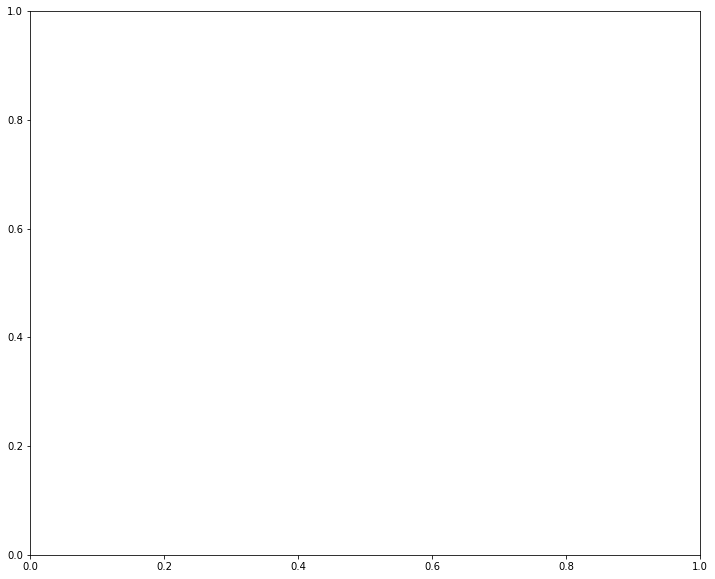

In [26]:
mask=np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax= plt.subplots(figsize=(12,10))
ax= sns.heatmap(matrix, mask=mask, annot=True)

# Deal with outliers

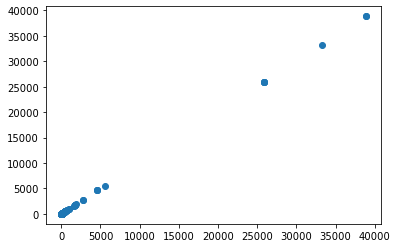

In [28]:
plt.scatter(x=data['reviews'],y=data['reviews']) #we check on a scattered plot to see if there are some outliers

In [29]:
data.max()

position       user research data analyst intern for mental h...
company                                                 zoomdata
description    working within a global team of data analysts,...
reviews                                                  38844.0
location                                    washington, dc 20037
state                                                         wa
city                                                  washington
dtype: object

In [30]:
data.sort_values('reviews',ascending=False).head(10) #We can check there are 5 outliers from company Walmart.

,position,company,description,reviews,location,state,city
74,data analyst supply chain,the home depot,position purpose:\na data analyst supply chain...,38844.0,"atlanta, ga",ga,atlanta
251,sr data analyst supply chain,the home depot,position purpose:\na sr data analyst supply ch...,38844.0,"atlanta, ga",ga,atlanta
6785,lead data analyst - digital test and measurement,target,description:\njoin us as a lead data analyst –...,33275.0,"sunnyvale, ca",ca,sunnyvale
2498,data analyst,amazon.com,job description\nthe alexa information team st...,25902.0,"cambridge, ma",ma,cambridge
2450,data analyst - german,amazon.com,job description\nthe alexa information team st...,25902.0,"cambridge, ma",ma,cambridge
2521,data analyst - japanese,amazon.com,job description\nthe alexa information team st...,25902.0,"cambridge, ma",ma,cambridge
5130,"data analyst, tax calculation services",amazon.com,job description\namazon tax calculation servic...,25895.0,"seattle, wa",wa,seattle
1498,digital marketing data analyst,boeing,"chicago,illinois,united states 4a34p3 the boei...",5550.0,"chicago, il",il,chicago
4432,cybercrime data analyst,microsoft,do you have a passion for snooping through big...,4618.0,"redmond, wa 98052",wa,redmond
4433,data analyst,microsoft,data analyst – xbox game pass (data &amp; insi...,4618.0,"redmond, wa 98052",wa,redmond


In [ ]:
# from scipy import stats
# num_cols = list(data.select_dtypes(include=np.number).columns)
# data_no_outliers = data[(np.abs(stats.zscore(data[num_cols])) < 3).all(axis=1)]
# data_no_outliers.reset_index(drop=True, inplace=True)

In [31]:
#different methods to scale our numerical values
def maxmin_scaler (data):
    from sklearn.preprocessing import MinMaxScaler
    df = MinMaxScaler().fit(data).transform(data)
    df = pd.DataFrame(df, index=data.index, columns=data.columns)
    return df

X_num_maxmin = maxmin_scaler(X_num)

def abs_scaler (data):
    from sklearn.preprocessing import MaxAbsScaler
    df = MaxAbsScaler().fit(data).transform(data)
    df = pd.DataFrame(df, index=data.index, columns=data.columns)
    return df

X_num_abs = abs_scaler(X_num)

def st_scaler (data):
    from sklearn.preprocessing import StandardScaler
    df = StandardScaler().fit(data).transform(data)
    df = pd.DataFrame(df, index=data.index, columns=data.columns)
    return df

X_num_st = st_scaler(X_num)

def rob_scaler (data):
    from sklearn.preprocessing import RobustScaler
    df = RobustScaler().fit(data).transform(data)
    df = pd.DataFrame(df, index=data.index, columns=data.columns)
    return df

X_num_rob = rob_scaler(X_num)

def nor_sclaer (data):
    from sklearn.preprocessing import Normalizer
    df = Normalizer().fit(data).transform(data)
    df = pd.DataFrame(df, index=data.index, columns=data.columns)
    return df

X_num_nor = nor_sclaer(X_num)

def trans_sclaer (data):
    from sklearn.preprocessing import QuantileTransformer
    df = QuantileTransformer().fit(data).transform(data)
    df = pd.DataFrame(df, index=data.index, columns=data.columns)
    return df

X_num_trans = trans_sclaer(X_num)

def pow_scaler (data):
    from sklearn.preprocessing import PowerTransformer
    df = PowerTransformer().fit(data).transform(data)
    df = pd.DataFrame(df, index=data.index, columns=data.columns)
    return df

X_num_pow = pow_scaler(X_num)


ValueError: at least one array or dtype is required

In [ ]:
X_dummies=pd.get_dummies(X_cat, drop_first=True)
X_dummies

In [ ]:
def training_lr (num_scaled,cat_scaled):
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    
    #Bring categorical and numerical columns back together
    X_final = pd.concat((num_scaled,cat_scaled),axis=1)
    X_final
    
    #Splitting into train set and test dataset using random state
    X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3, random_state=40)
    
    #Apply linear regression model
    lm=linear_model.LinearRegression()
    model=lm.fit(X_train,y_train)
    
    #Fit over your train data and predict against X test
    preds=lm.predict(X_test)
    preds
    
    res = [y_test,preds,X_test]
    
    return res
    

train = training_lr(X_num_st,X_dummies)

In [ ]:
def validation (y_test,preds):
    #metrics to evaluate model accuracy
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    
    res = [1,2,3,4]
    #R2
    res[0] = round(r2_score(y_test,preds),4)
    #MSE
    res[1] = round(mean_squared_error(y_test,preds),4)
    #RMSE
    res[2] = round(np.sqrt(mean_squared_error(y_test,preds)),4)
    #MAE
    res[3] = round(mean_absolute_error(y_test, preds),4)
    
    return res

res = validation(train[0],train[1])
print('R2:',res[0],'-','MSE:',res[1],'-','RMSE:',res[2],'-','MAE:',res[3],'-',)

In [ ]:
import re
# regex = re.compile('[^a-zA-Z0-9 -]')
# non_alphanum=regex.sub(' ', str(data['description']))
# # non_alphanum
# word = " ".join(re.findall("[a-zA-Z]+", non_alphanum))
# word

text = re.sub(r"[^A-Za-z0-9]", " ", str(data['description']))

In [ ]:
text